# CSE475 Project, Due: Friday, 05/02/2025

## Instruction

1. Please submit your Jupyter Notebook file (the. ipynb file) containing your code and the outputs produced by your code (note that .ipynb file can contain both the code and the outputs) to Canvas. Please name your file CSE475-Project-LastName-FirstName.ipynb.

2. If you have any questions on the homework problems, you should post your question on the Canvas discussion board (under Project Q&A), instead of sending emails to the instructor or TA. We will answer your questions there. In this way, we can avoid repeated questions, and help the entire class stay on the same page whenever any clarification/correction is made.

## Handwritten Image Classifiation with Keras using MNIST and Fashion MNIST data

In this project, we will work with image data, the famous MNIST and Fashion MNIST data sets.  MNIST data set contains 70,000 images of handwritten digits (0-9) in grayscale (0=black, 255 = white). Fashion MNIST data set contains 70,000 images of clothing in grayscale (0=black, 255 = white). All the images are 28 pixels by 28 pixels for a total of 784 pixels. This is quite small by image standards. Also, the images are well centered and isolated. <br><br>
We will use a Convolutional Neural Network and compare it with a linear neural network. 

### In the first part of this project, we will walk you through loading the data, building a neural network, and training it.  Then it will be your turn to work on different models.

In [1]:
# Preliminaries

from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import RMSprop
from keras.datasets import fashion_mnist

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Let's explore the dataset a little bit

In [2]:
# Load the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

Let's just look at a particular example to see what is inside

In [4]:
x_train[333]  ## Just a 28 x 28 numpy array of ints from 0 to 255

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  87, 138,
        170, 253, 201, 244, 212, 222, 138,  86,  22,   0,   0,   0,   0,
          0,   0],
       [  

In [5]:
# What is the corresponding label in the training set?
y_train[333]

8

In [6]:
# Let's see what this image actually looks like

plt.imshow(x_train[333], cmap='Greys_r')

In [7]:
# this is the shape of the np.array x_train
# it is 3 dimensional.
print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(60000, 28, 28) train samples
(10000, 28, 28) test samples


In [8]:
## For our purposes, these images are just a vector of 784 inputs, so let's convert
x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)

## Keras works with floats, so we must cast the numbers to floats
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

## Normalize the inputs so they are between 0 and 1
x_train /= 255
x_test /= 255


In [9]:
# convert class labels to one-hot vectors
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

y_train[333]  # now the digit k is represented by a 1 in the kth entry (0-indexed) of the length 10 vector

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

In [10]:
# We will build a model with two fully connected layers (using "Dense")
# We will use dropout of .5 to help regularize
model_1 = Sequential()
model_1.add(Dense(64, activation='relu', input_shape=(784,)))
model_1.add(Dropout(0.5))
model_1.add(Dense(64, activation='relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(10, activation='softmax'))

/Users/atharva7/miniconda3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
## print the summary of the built model. Note that this model has a LOT of parameters
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,050 (215.04 KB)

 Trainable params: 55,050 (215.04 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Let's compile the model
learning_rate = .001
model_1.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=learning_rate),
              metrics=['accuracy'])
# note that `categorical cross entropy` is the natural generalization 
# of the loss function we had in binary classification case to multiclass case

In [ ]:
# Now let's fit (train model_1).

batch_size = 128  # mini-batch with 128 examples
epochs = 30
history_1 = model_1.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5755 - loss: 1.2826 - val_accuracy: 0.9185 - val_loss: 0.2928
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8559 - loss: 0.5059 - val_accuracy: 0.9328 - val_loss: 0.2281
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - accuracy: 0.8838 - loss: 0.4200 - val_accuracy: 0.9438 - val_loss: 0.1970
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step - accuracy: 0.8980 - loss: 0.3663 - val_accuracy: 0.9473 - val_loss: 0.1874
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 912us/step - accuracy: 0.9029 - loss: 0.3499 - val_accuracy: 0.9525 - val_loss: 0.1776
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step - accuracy: 0.9083 - loss: 0.3307 - val_accuracy: 0.9522 - val_loss: 0.1714
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step - accuracy: 0.9134 - loss: 0.3200 - val_accuracy: 0.9541 - val_loss: 0.1665
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/step - accuracy: 0.9130 - loss: 0.3205 - val_

In [ ]:
## We will use Keras evaluate function to evaluate performance on the test set

score = model_1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.1705971360206604
Test accuracy: 0.9660999774932861


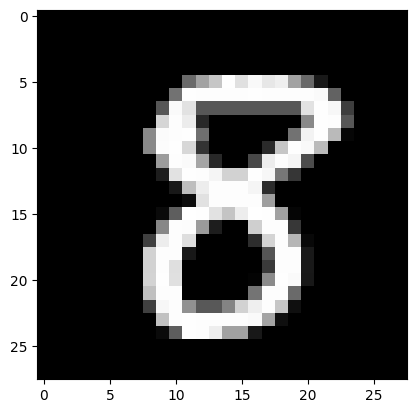

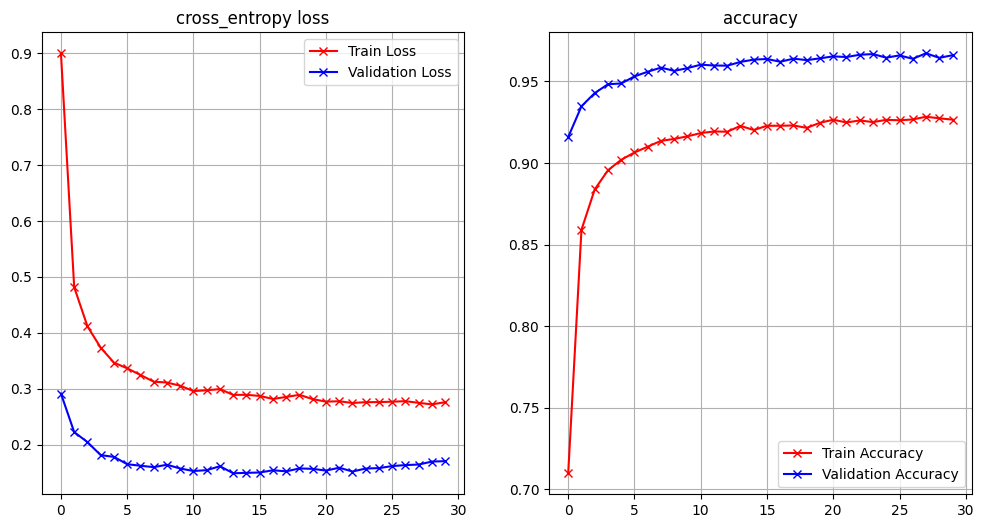

In [ ]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history_1.history["loss"],'r-x', label="Train Loss")
    ax.plot(history_1.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)

    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history_1.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history_1.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)
    
plot_loss_accuracy(history_1)
plt.show()

This is reasonably good performance, but we can do even better!  Next you will build an even bigger network and compare the performance.

### Keras Layers for CNNs
- Previously we built a neural network using primarily the Dense, Activation and Dropout Layers.

- Here we will describe how to use some of the CNN-specific layers provided by Keras

#### Conv2D

```python
keras.layers.convolutional.Conv2D(filters, kernel_size, strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1, 1), activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, **kwargs)
```

A few parameters explained below for your convenience (please do check the manual of Keras to understand the meaning of all the paramters)
- `filters`: the number of filters,  in other words, the depth of the output.
- `kernel_size`: an (H,W) tuple giving the height and width of the kernel (filter) to be used. It can also be an integer x which is equivalent to a tuple (x,x) 
- `strides`: and (x,y) tuple giving the stride in each dimension.  Default is `(1,1)`. It can also be an integer x which is equivalent to a tuple (x,x) 
- `input_shape`: required only for the first layer

Note that the size of the output will be determined by the kernel_size and strides.

#### MaxPooling2D
`keras.layers.pooling.MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None)`

- `pool_size`: the (x,y) size of the grid to be pooled.
- `strides`: Assumed to be the `pool_size` unless otherwise specified

#### Flatten
Turns its input into a one-dimensional vector (per instance).  Usually used when transitioning between convolutional layers and fully connected layers.


# Your tasks for this project (three tasks, (1)-(3))


### (1) Build your own CNN model (30pts)
Use the Keras "Sequential" functionality to build a convolutional neural network named `model_2` with the following specifications:
<br>
<br>
Model Architecture:<br>
We will build model_2 according to the famous LeNet-5 architecutre below and measure its performance.
<br>
    Convolution -> Relu -> Max pooling -> Convolution -> Relu -> Max pooling -> FC1 -> Relu -> FC2 -> Relu -> Output(SoftMax)
<br>

1. Convolution1 kernel size: 5(H) x 5(W) x 6(filters), stride = 1, no padding
2. Max pooling1 kernel size: 2(H) x 2(W), stride = 2
3. Convolution2 kernel size: 5(H) x 5(W) x 16(filters), stride = 1, no padding
4. Max pooling2 kernel size: 2(H) x 2(W), stride = 2
5. Fully Connected1 size: 120
6. Fully Connected2 size: 84
7. Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128
8. Plot the loss and accuracy graph for training the new model 
9. Evaluate the model on test data

Please train the built model on the training data (x_train, y_train), and print the test loss and test accuracy of the trained model on the test data (x_test, y_test). Please call the given plot_loss_accuracy function on the history returned by model_2.fit to have the curves of loss and accuracy on the training data and the validation data during the training process of model_2. Note that the validation data is the same as the test data.

Hints:
<ul>
  <li> You will need to have a Flatten layer to make the dimension of the Output be 10 (the number of classes). Check how to connect the output of convolution layer with the first fully connected layer.
<li> You will not be graded on the accuracy of your model, but it should have a decent accuracy of at least 70%. Performance below 70% means there is something wrong with the implementation.
<li> Do not use any padding or dropout in model_2. Such choices can be used for Project Bonus and Fashion MNIST.
    </li></ul>

To use the LeNet model, we need to do some preprocessing on the data first.

In [ ]:
# Data is currently flattened, we need to reshape it back to 28 * 28. To do that we reshape the data.

x_train = np.reshape(x_train, [-1, 28, 28])
x_test = np.reshape(x_test, [-1, 28, 28])
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
# model_2 requires input of 32 X 32. So we will pad the train and test images with zeros to increase the size to 32 X 32.

x_train=np.pad(x_train, ((0,0), (2,2), (2, 2)), 'constant')
x_test=np.pad(x_test, ((0,0), (2,2), (2, 2)), 'constant')
x_train.shape, x_test.shape

((60000, 32, 32), (10000, 32, 32))

In [ ]:
# Convolutional model requires input to be of 3 dimensions. We will add a channel dimension to it.

x_train = np.reshape(x_train, [-1, 32, 32, 1])
x_test = np.reshape(x_test, [-1, 32, 32, 1])
x_train.shape, x_test.shape

((60000, 32, 32, 1), (10000, 32, 32, 1))

### Write your code below for task (1)

In [ ]:
# Now we will build the convolutional model. We will use the Sequential API to build the model.
model_2 = Sequential()

# Building the first convolutional layer:
model_2.add(Conv2D(
    filters=6,
    kernel_size=(5, 5),
    strides=(1, 1),
    padding='valid',
    activation='relu',
    input_shape=(32, 32, 1)
))

# Performing Step 2, i.e building the first max pooling layer
model_2.add(MaxPooling2D(
    pool_size=(2, 2),
    strides=2
))

# Performing Step 3, i.e building the second convolutional layer
model_2.add(Conv2D(
    filters=16,
    kernel_size=(5, 5),
    strides=(1, 1),
    padding='valid',
    activation='relu'
))

# Performing Step 4, i.e building the second max pooling layer
model_2.add(MaxPooling2D(
    pool_size=(2, 2),
    strides=2
))

# Performing Step 5, i.e Building the first fully connected layer
# First we need to flatten the output of the last max pooling layer to build a fully connected layer
model_2.add(Flatten())

# Fully Connected Layer 1
model_2.add(Dense(120, activation='relu'))

# Fully Connected Layer 2
model_2.add(Dense(84, activation='relu'))

# Output Layer for 10-class classification
model_2.add(Dense(10, activation='softmax'))

/Users/atharva7/miniconda3/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Training the model

learning_rate = 0.001
model_2.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(learning_rate=learning_rate),
    metrics=['accuracy']
)

history_2 = model_2.fit(
    x_train, y_train,
    epochs=20,
    batch_size=128,
    validation_data=(x_test, y_test)
)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8061 - loss: 0.6138 - val_accuracy: 0.9670 - val_loss: 0.1033
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9740 - loss: 0.0857 - val_accuracy: 0.9837 - val_loss: 0.0517
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9832 - loss: 0.0538 - val_accuracy: 0.9811 - val_loss: 0.0534
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9879 - loss: 0.0396 - val_accuracy: 0.9868 - val_loss: 0.0363
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9896 - loss: 0.0320 - val_accuracy: 0.9864 - val_loss: 0.0394
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9915 - loss: 0.0259 - val_accuracy: 0.9881 - val_loss: 0.0333
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9931 - loss: 0.0212 - val_accuracy: 0.9896 - val_loss: 0.0312
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9944 - loss: 0.0173 - val_accuracy

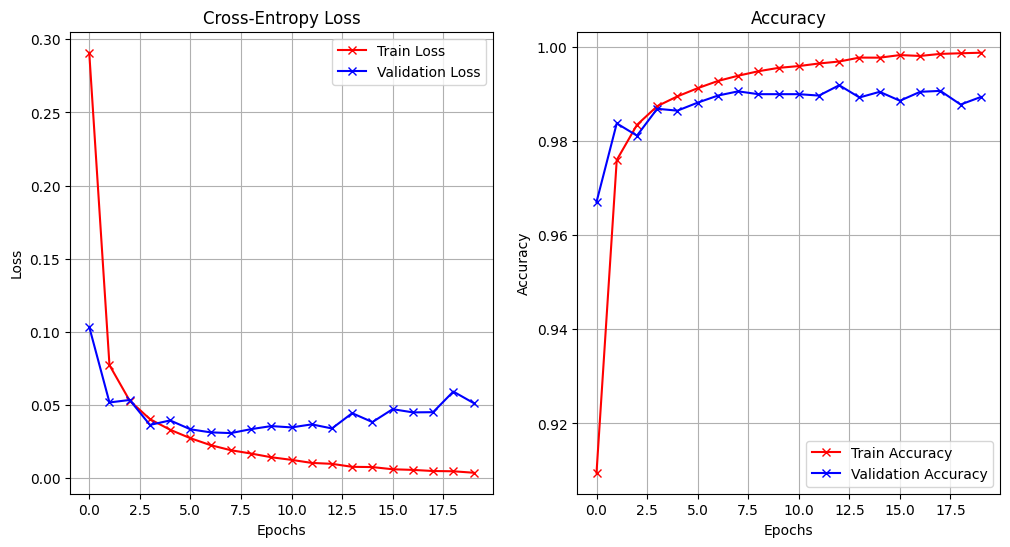

In [ ]:
# Plotting the loss and accuracy of the model which we trained just now

def plot_loss_accuracy(history_2):
    fig = plt.figure(figsize=(12, 6))

    # Loss plot
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history_2.history["loss"], 'r-x', label="Train Loss")
    ax.plot(history_2.history["val_loss"], 'b-x', label="Validation Loss")
    ax.set_title('Cross-Entropy Loss')
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Loss')
    ax.legend()
    ax.grid(True)

    # Accuracy plot
    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history_2.history["accuracy"], 'r-x', label="Train Accuracy")
    ax.plot(history_2.history["val_accuracy"], 'b-x', label="Validation Accuracy")
    ax.set_title('Accuracy')
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Accuracy')
    ax.legend()
    ax.grid(True)

    plt.show()
    
plot_loss_accuracy(history_2)

In [ ]:
# Evaluating the model on test data

test_loss, test_accuracy = model_2.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9854 - loss: 0.0715
Test Loss: 0.0513
Test Accuracy: 0.9893


### (2) Answer the following question (20pts)

Compare the curves of the loss and accuracy on the training data and the validation (test) data for model_1 and model_2. Please write down your observations. For example, (1) which model has higher validation (test) loss?  (2) which model has higher validation (test) accuracy? (3) Do (1)-(2) for the training loss and the training accuracy; (4) Which measure do you think is more meaningful, the loss or the accuracy?

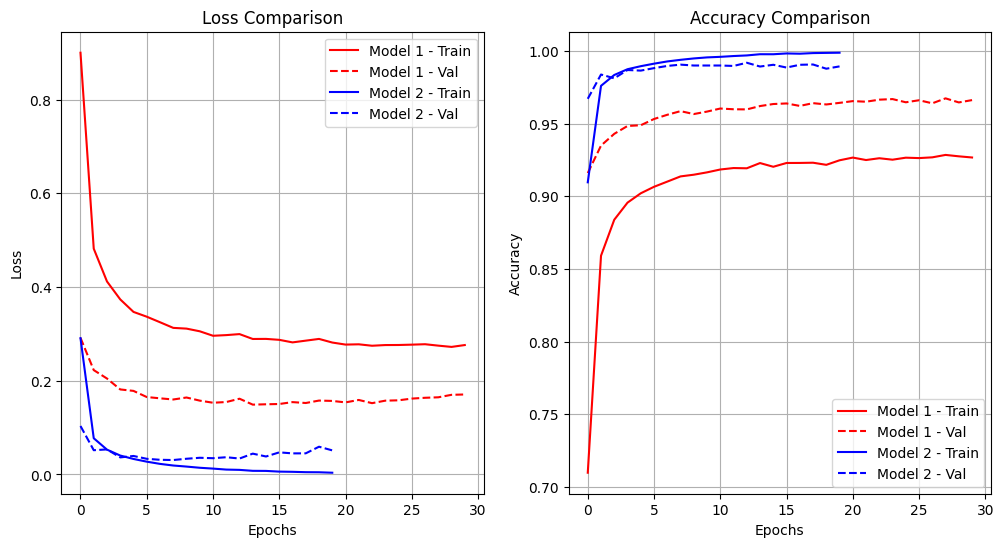

In [ ]:
# Comparing the loss and accuracy of the two models i.e. model_1 and model_2

def compare_histories(h1, h2):
    fig = plt.figure(figsize=(12, 6))

    # Loss comparison
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(h1.history["loss"], 'r-', label="Model 1 - Train")
    ax.plot(h1.history["val_loss"], 'r--', label="Model 1 - Val")
    ax.plot(h2.history["loss"], 'b-', label="Model 2 - Train")
    ax.plot(h2.history["val_loss"], 'b--', label="Model 2 - Val")
    ax.set_title('Loss Comparison')
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Loss')
    ax.legend()
    ax.grid(True)

    # Accuracy comparison
    ax = fig.add_subplot(1, 2, 2)
    ax.plot(h1.history["accuracy"], 'r-', label="Model 1 - Train")
    ax.plot(h1.history["val_accuracy"], 'r--', label="Model 1 - Val")
    ax.plot(h2.history["accuracy"], 'b-', label="Model 2 - Train")
    ax.plot(h2.history["val_accuracy"], 'b--', label="Model 2 - Val")
    ax.set_title('Accuracy Comparison')
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Accuracy')
    ax.legend()
    ax.grid(True)

    plt.show()
    
compare_histories(history_1, history_2)

### Answer for (1) which model has higher validation (test) loss?

Observation:  
Model 1 has a higher validation loss throughout the training process when compared to model 2. On the other hand, model 2 has much lower validation loss which indicates stable predictions on the testing data. Model 2 is based on the Convolutional Neural Network architecture which is better suited for image classification and model 1 uses only fully connected layers, the main disadvantage of this model is that it ignores the spatial structure of images. 

Therefore we can conculde that **Model 2** demonstrates **superior generalisation and confidence** on test data as seen from its **lower vaidation loss**.

### Answer for (2) which model has higher validation (test) accuracy?

Observation:   
Model 2 achieves a higher validation/test accuracy than model 1. Even though model 1 shows improvement but still remains below the model 2's performance at all times across all epochs. The CNN architecute in model 2 preserves spatial relationships using convolution and pooling layers and thus learns image features hierarchically, which is lacking in model 1 thus making it less efficient at recognising image patterns. 

Thus due to the CNN structure, model 2 achieves higher test accuracy than model 1 and makes more accurate predictions on the test dataset.


### Answer for (3) Do (1)-(2) for the training loss and the training accuracy;

Observation:  
--> **Training Loss:**   
From the training loss curve, we can conclude that **Model 2 performs much better than Model 1**. The loss for Model 1 decreses slowly and stops improving much after 6th epoch but loss for model 2 droips really quickly and reaches almost 0. This is mostly because Model 2 is a CNN architecture and model 1 uses only dense layers and works with flattenend inputs. Model 2 learns hierarchically from the patterns like edges and shapes from images using convolutional filters. This is why Model 2 minimizes the loss quickly whereas model 1 takes some time to learn the same features. 

--> **Training Accuracy:**    
It is imminent that model 2 also has better training accuracy as it tackles the loss in a btter way than model 1. Model 2 reached a higher training accuracy of about 99% whereas the accuracy of model 1 is around 96%. Model 1 uses dropout whihch is a regularization technique which helps us to tackle overfitting but at the same time it can slow down how well the model fits the training data, this might be the reason behind the loss not going down significantly after 6 epochs. Model 2 does not have dropout and instead uses convolutional layers, whch learn patterns in images, this helps the model to memorize the data in a better way. 

**Conclusion:**    
Based on both training loss and accuracy, **Model 2 performs better than Model 1**. This shows the importance of model design in machine learning especially when dealing with image data. 


### Answer for (4) Which measure do you think is more meaningful, the loss or the accuracy?

In my opinion, loss is the more meaningful meausre when it comes to evaluating the model's performance. While accuracy tells us how many predictions were correct, it doesn't reflect how confident the model is about the predictions. To give a real world example, a model predicting the correct class with 51% confidence is treated the same as predicting the same result with 99% confidence, both of these are counted as correct under accuracy. But loss captures this difference, penalising low-confidence predictions even if they are technically right. 

As far as I have seen through this project, loss gives us deeper insight into how well the model is learning and improving over time. Especially in multi - class classifications, where probability distributions matter, loss is more nuanced and reliable indicator than accuracy alone. 

I would like to conclude by saying that while accuracy is easier to interpret, understand and useful for quick comparisons, I think that loss provides a bigger and complete picture of the model performance like how fast it is learning, especially during the training. 

### We will perform similar tasks for Fashion MNIST dataset. 

Fashion MNIST has 10 categories of clothing items:<br>

| Label | Description | 
| --- | --- | 
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

In [ ]:
# Load the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [ ]:
x_train[0].shape

(28, 28)

In [ ]:
#Let's just look at a particular example to see what is inside

x_train[333]  ## Just a 28 x 28 numpy array of ints from 0 to 255

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,
         42,  92,  71, 107,  33,   0,   3,   0,   1,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2,   0,  23,
        145,   0,   0,   0, 113,  20,   0,   3,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  89,
          8,   0,  10,   0,  36, 104,   0,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,  37,  97,
          0,   5,   1,   0,   0, 141,  23,   0,   2,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   5,   0,  70,  75,
          0,   6,   1,   0,   0, 141,  56,   0,   5,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,  85,  57,
          0,   5,   1,   1,   0, 126,  62,   0,   6,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
# What is the corresponding label in the training set?
y_train[333]

8

In [ ]:
# Let's see what this image actually looks like

plt.imshow(x_train[333], cmap='Greys_r')

In [ ]:
# this is the shape of the np.array x_train
# it is 3 dimensional.
print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(60000, 28, 28) train samples
(10000, 28, 28) test samples


In [ ]:
## For our purposes, these images are just a vector of 784 inputs, so let's convert
x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)

## Keras works with floats, so we must cast the numbers to floats
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

## Normalize the inputs so they are between 0 and 1
x_train /= 255
x_test /= 255

In [ ]:
# convert class vectors to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

y_train[333]  

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

Reperforming the earlier preprocessing methods

In [ ]:
# Data is currently flattened, we need to reshape it back to 28 * 28. To do that we reshape the data.

x_train = np.reshape(x_train, [-1, 28, 28])
x_test = np.reshape(x_test, [-1, 28, 28])
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
# LeNet requires input of 32 X 32. So we will pad the train and test images with zeros to increase the size to 32 X 32.

x_train=np.pad(x_train, ((0,0), (2,2), (2, 2)), 'constant')
x_test=np.pad(x_test, ((0,0), (2,2), (2, 2)), 'constant')
x_train.shape, x_test.shape

((60000, 32, 32), (10000, 32, 32))

In [ ]:
# Convolutional model requires input to be of 3 dimensions. We will add a channel dimension to it.

x_train = np.reshape(x_train, [-1, 32, 32, 1])
x_test = np.reshape(x_test, [-1, 32, 32, 1])
x_train.shape, x_test.shape

((60000, 32, 32, 1), (10000, 32, 32, 1))

### (3) Training on Fashion MNIST (50pts)

Build a convolutional neural network of your choice. You can freely choose a differnet network structure, learning rate or number of epochs, which (you believe) will lead to a good model for this data set. Report the accuracy of your model on the test data (x_test,y_test).

### Write your code below for task (3)

### Building the Model:

We will start building the model, the basic structure of the model is as follows:

1. 



In [ ]:
from tensorflow.keras.layers import Flatten,LeakyReLU

In [ ]:
model_3 = Sequential()

# Step 1: We will now create the first convolutional layer with 32 filters of size 3X3. We do this to detect features in the image. 
# The activation function we used is LeakyReLU with alpha as 0.1 and finally we use max pooling layer with 2X2 size.
model_3.add(Conv2D(32, kernel_size=(3, 3), activation='linear', input_shape=(32, 32, 1)))
model_3.add(LeakyReLU(alpha=0.1))
model_3.add(MaxPooling2D(pool_size=(2, 2)))

# Step 2: Now we add the second convolutional layer. This layer consists of 64 filters of 3X3 size. 
# We again use the LeakyReLU activation with alpha as 0.1 and finally we use max pooling layer with 2X2 size.
model_3.add(Conv2D(64, kernel_size=(3, 3), activation='linear'))
model_3.add(LeakyReLU(alpha=0.1))
model_3.add(MaxPooling2D(pool_size=(2, 2)))

# Step 3: Now we add the third convolutional layer ot the model with 128 filters of size 3X3, followed by LeakyReLU and then max pooling layer.
model_3.add(Conv2D(128, kernel_size=(3, 3), activation='linear'))
model_3.add(LeakyReLU(alpha=0.1))
model_3.add(MaxPooling2D(pool_size=(2, 2)))

# Step 4: Now we have to flattern the output into a one dimensional array.
model_3.add(Flatten())

# Step 5: Adding some non-lineraity to model by adding a 128 units dense layer. Here too we use LeakyReLU activation function.
model_3.add(Dense(128, activation='linear'))
model_3.add(LeakyReLU(alpha=0.1))

# Step 6: Similar to earlier step, we add another dense layer of 64 units with LeakyReLU activation function.
model_3.add(Dense(64, activation='linear'))
model_3.add(LeakyReLU(alpha=0.1))

# Finally we add the output layer with 10 units as there are 10 categories and softmax activation function.
model_3.add(Dense(10, activation='softmax'))


/Users/atharva7/miniconda3/lib/python3.10/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [ ]:
# Now we will compile the model using Adam optimizer and categorical crossentropy loss function.

from tensorflow.keras.optimizers import Adam

model_3.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Now we will train the model with batch size of 128 and 30 epochs.

history_3 = model_3.fit(
    x_train, y_train,
    batch_size=128,
    epochs=35,
    validation_data=(x_test, y_test)
)


Epoch 1/35
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.9898 - loss: 0.0288 - val_accuracy: 0.9141 - val_loss: 0.4906
Epoch 2/35
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - accuracy: 0.9898 - loss: 0.0285 - val_accuracy: 0.9131 - val_loss: 0.5345
Epoch 3/35
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.9922 - loss: 0.0226 - val_accuracy: 0.9129 - val_loss: 0.5107
Epoch 4/35
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.9911 - loss: 0.0236 - val_accuracy: 0.9152 - val_loss: 0.5168
Epoch 5/35
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.9925 - loss: 0.0207 - val_accuracy: 0.9158 - val_loss: 0.5284
Epoch 6/35
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 41ms/step - accuracy: 0.9929 - loss: 0.0197 - val_accuracy: 0.9148 - val_loss: 0.5717
Epoch 7/35
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - accuracy: 0.9917 - loss: 0.0245 - val_accuracy: 0.9125 - val_loss: 0.5832
Epoch 8/35
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 47ms/step - accuracy: 0.9919 - loss: 0.0223 - 

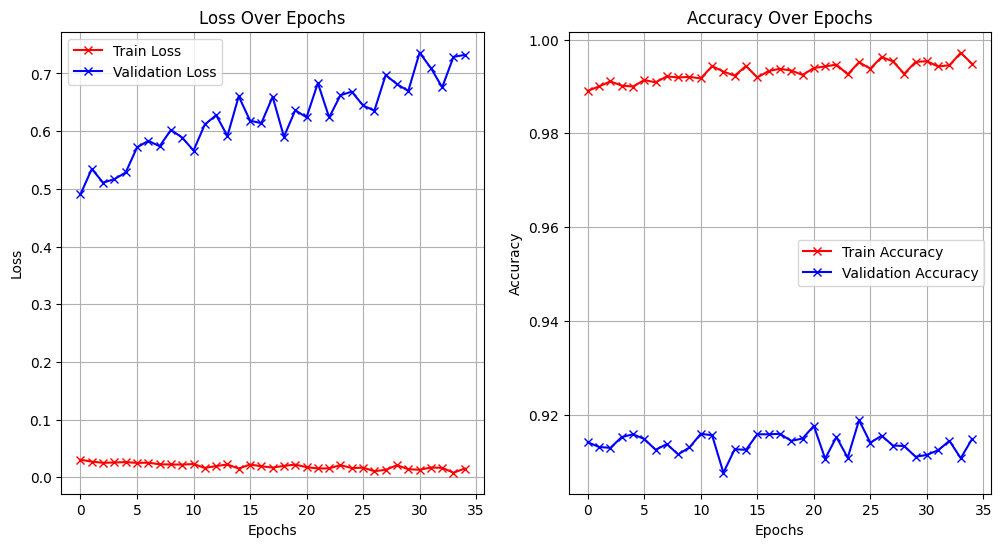

In [ ]:
# Plotting the training and validation loss and accuracy of the model_3, which we trained just now.

def plot_loss_accuracy(history):
    import matplotlib.pyplot as plt

    fig = plt.figure(figsize=(12, 6))

    # Loss
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"], 'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"], 'b-x', label="Validation Loss")
    ax.set_title('Loss Over Epochs')
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Loss')
    ax.legend()
    ax.grid(True)

    # Accuracy
    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"], 'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"], 'b-x', label="Validation Accuracy")
    ax.set_title('Accuracy Over Epochs')
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Accuracy')
    ax.legend()
    ax.grid(True)

    plt.show()

# Call the function
plot_loss_accuracy(history_3)


In [ ]:
test_loss, test_accuracy = model_3.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9135 - loss: 0.7791
Test Accuracy: 0.9148


In [ ]:
print(f"Test Accuracy of the Model: {test_accuracy * 100:.2f}%")

Test Accuracy of the Model: 91.48%
